# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей у клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Изучение данных

In [1]:
!pip install pymystem3

import pandas as pd                      
from pymystem3 import Mystem
from collections import Counter
import matplotlib.pyplot as plt
m = Mystem()

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv("C:\\Users\\Дмитрий\\Desktop\\Проекты Я.Практикум\\reliability_of_borrowers\data.csv")

In [3]:
data.info()                              
display(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


**Выводы**
* В столбцах `days_employed` и `total_income` есть пропущенные значения, причем в одних и тех же строках. Возможно, люди работали неофициально, за границей, данные об их трудовом стаже и зарплате были утеряны или не загрузились. Количество пропущенных значений более 10%, из-за их удаления можно исказить результаты анализа.

* Значения в столбцах `days_employed` и `total_income` вещественной формы. Целесообразно привести их к целому, т.к. значения после запятой не представляют ценности.

* В столбце `days_employed` присутствуют отрицательные значения. Вероятно, из-за ошибки в выгрузке данных.

* В стобце `education` присутствуют дубликаты. Вероятно, из-за человеческого фактора (необходима стандартизация).

* Цели кредита (`purpose`) записаны в нестандартной форме, и разные по записи значения могут относиться к одной цели. Вызвано это человеческим фактором (необходима стандартизация).


## Предобработка данных

### Обработка пропусков

Заменям отрицательные значения на положительные

In [4]:
data['days_employed'] = abs(data['days_employed']) 
display(data) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


In [5]:
data[['days_employed', 'total_income']].describe()

,days_employed,total_income
count,19351.000000,1.935100e+04
mean,66914.728907,1.674223e+05
std,139030.880527,1.029716e+05
min,24.141633,2.066726e+04
25%,927.009265,1.030532e+05
50%,2194.220567,1.450179e+05
75%,5537.882441,2.034351e+05
max,401755.400475,2.265604e+06


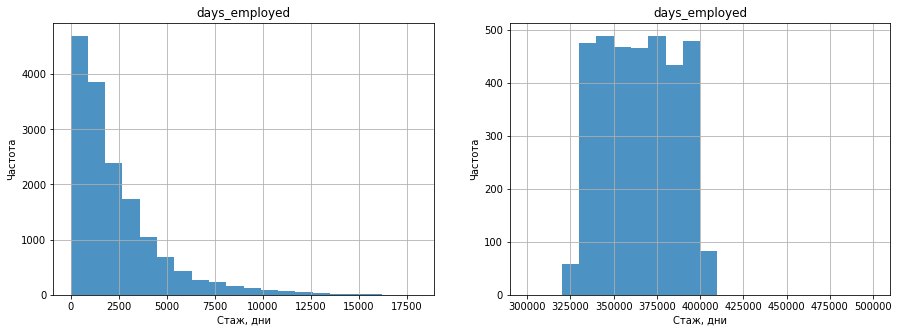

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(data['days_employed'], bins=20, alpha=0.8, range = (0, 18000))
plt.title('days_employed')
plt.ylabel('Частота')
plt.xlabel('Стаж, дни')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(data['days_employed'], bins=20, alpha=0.8, range = (300000, 500000))
plt.title('days_employed')
plt.ylabel('Частота')
plt.xlabel('Стаж, дни')
plt.grid(True)
plt.show()

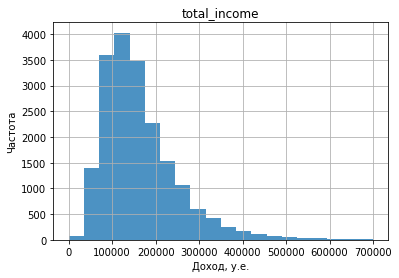

In [7]:
plt.hist(data['total_income'], bins=20, range=(0,700000), alpha=0.8)
plt.title('total_income')
plt.ylabel('Частота')
plt.xlabel('Доход, у.е.')
plt.grid(True)
plt.show()

Столбцы `total_income` и `days_employed` имеют скошенное слева распределение с длинным правым хвостом. В столбце `days_employed` присутствуют аномальные значения (изолированная часть распределения), которые сильно искажают среднее (среднее значение больше медианы примерно в 27 раз!). В `total_income` среднее и медиана отличаются более, чем на 10%. Т.к. распределения признаков ненормальны, правильнее будет заполнить их медианами по столбцам.

In [8]:
data['days_employed'] = data['days_employed'].fillna(data['days_employed'].median())       
data['total_income'] = data['total_income'].fillna(data['total_income'].median())

### Замена типа данных

In [9]:
data['days_employed'] = data['days_employed'].astype('int') 
data['total_income'] = data['total_income'].astype('int')
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


In [10]:
display(data)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем
21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем
21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость
21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля


**Вывод**

Методом astype() заменили вещественные значения на целые в стобцах `days_employed` и `total_income`, т.к. значения после запятой в данном случае не представляют ценности. Метод astype() использовали, т.к. он, в отличие от int(), работает со всем столбцом и не нуждается в цикле (экономит ресурсы компьютера).

### Обработка дубликатов

In [11]:
print(data.duplicated().sum())                     
data = data.drop_duplicates().reset_index(drop=True)  
print(data.duplicated().sum())   

54
0


In [12]:
data['education'].value_counts()    

среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

В столбце присутствуют неявные дубликаты, необходимо свести все значения к нижнему регистру.

In [13]:
data['education'] = data['education'].str.lower() 

In [14]:
data['family_status'].value_counts()                

женат / замужем          12344
гражданский брак          4163
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64

In [15]:
data['family_status'] = data['family_status'].str.lower() 

In [16]:
data['income_type'].value_counts()   

сотрудник          11091
компаньон           5080
пенсионер           3837
госслужащий         1457
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64

**Вывод**

* В таблице обнаружено 54 явных дубликата. Удалили их методом drop_duplicates().
* В столбце `education` одни и те же уровни образования были написаны в разных регистрах. Это может быть связано с отсутствием стандарта записи у сотрудников банка. Проблема решается путем сведения всех значений к нижнему регистру.

### Лемматизация

In [17]:
lemmas_list = []
for purpose in data['purpose']:
    lemmas = ''.join(m.lemmatize(purpose)).strip()
    lemmas_list.append(lemmas)
print(Counter(lemmas_list))

Counter({'автомобиль': 972, 'свадьба': 793, 'на проведение свадьба': 773, 'сыграть свадьба': 769, 'операция с недвижимость': 675, 'покупка коммерческий недвижимость': 662, 'операция с жилье': 652, 'покупка жилье для сдача': 652, 'операция с коммерческий недвижимость': 650, 'покупка жилье': 646, 'жилье': 646, 'покупка жилье для семья': 638, 'строительство собственный недвижимость': 635, 'недвижимость': 633, 'операция со свой недвижимость': 627, 'строительство жилой недвижимость': 625, 'покупка недвижимость': 621, 'покупка свой жилье': 620, 'строительство недвижимость': 619, 'ремонт жилье': 607, 'покупка жилой недвижимость': 606, 'на покупка свой автомобиль': 505, 'заниматься высокий образование': 496, 'сделка с подержанный автомобиль': 486, 'свой автомобиль': 479, 'на покупка подержать автомобиль': 478, 'на покупка автомобиль': 472, 'приобретение автомобиль': 461, 'дополнительный образование': 460, 'сделка с автомобиль': 455, 'высокий образование': 452, 'образование': 447, 'получение до

**Вывод**

Лемматизировали значения в столбце `purpose` и подсчитали число одинаковых лемм. Как видно, все леммы относятся к 4 категориям: автомобиль, свадьба, недвижимость, образование.

### Категоризация данных

Создаем функцию для лемматизации и категоризации цели кредита.

In [18]:
def purpose_category(row):                  
    m_purpose = m.lemmatize(row)
    if 'свадьба' in m_purpose:
        return 'свадьба'
    elif 'недвижимость' in m_purpose or 'жилье' in m_purpose:
        return 'недвижимость'
    elif 'автомобиль' in m_purpose:
        return 'автомобиль'
    elif 'образование' in m_purpose:
        return 'образование'
    return 'другое'
data['purpose_category'] = data['purpose'].apply(purpose_category)     

def having_children(row):            
    if row != 0:
        return 'есть дети'
    return 'нет детей'
data['having_children'] = data['children'].apply(having_children)  

def total_income_category(income):      
    if  income < 70000:
        return 'низкий доход'
    if 70000 <= income <= 110000:
        return 'средний доход'
    if income > 110000:
        return 'высокий доход'
data['total_income_category'] = data['total_income'].apply(total_income_category)

def debt_status(debt):                  
    if debt != 0:
        return 'есть долги'
    return 'нет долгов'
data['debt_status'] = data['debt'].apply(debt_status)
display(data)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,purpose_category,having_children,total_income_category,debt_status
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,недвижимость,есть дети,высокий доход,нет долгов
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,автомобиль,есть дети,высокий доход,нет долгов
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,недвижимость,нет детей,высокий доход,нет долгов
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,образование,есть дети,высокий доход,нет долгов
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,свадьба,нет детей,высокий доход,нет долгов
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,недвижимость,есть дети,высокий доход,нет долгов
21467,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,автомобиль,нет детей,высокий доход,нет долгов
21468,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,недвижимость,есть дети,средний доход,есть долги
21469,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,автомобиль,есть дети,высокий доход,есть долги


**Вывод**

Присвоили каждой цели из столбца `purpose` одну из 4 категорий: автомобиль, свадьба, недвижимость, образование. По наличию детей разделили заемщиков на 2 категории: `'есть дети'` и `'нет детей'`. В зависимости от уровня доходов распределили заемщиков по 3 категориям: с высоким, средним и низким доходом (в соответствии с данными Всероссийского центра уровня жизни). Также разделили заемщиков в столбце `debt_status` на имевших и не имевших просроченной задолженности.

Категоризацию провели для упрощения анализа данных при поиске ответов на вопросы заказчика.
 

## Исследование кредитоспособности разных категорий заемщиков

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [19]:
table_child = data.pivot_table(index='having_children', 
                               columns='debt_status', 
                               values = 'debt',
                               aggfunc='count')  
table_child['процент должников'] = (table_child['есть долги']/
                                    (table_child['есть долги'] + 
                                     table_child['нет долгов'])*100)  
display(table_child)

debt_status,есть долги,нет долгов,процент должников
having_children,,,
есть дети,678,6686,9.206953
нет детей,1063,13044,7.535266


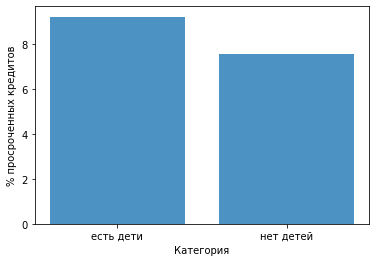

In [20]:
plt.figure(figsize=(6,4))
plt.bar(table_child.index, table_child['процент должников'], alpha=0.8)
plt.ylabel('% просроченных кредитов')
plt.xlabel('Категория')
plt.show()

**Вывод**

Заемщики с детьми чаще просрочивают платежи (9,2 % должников), заемщики без детей - реже (7,5 %).

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [21]:
table_family = data.pivot_table(index='family_status', 
                                columns='debt_status', 
                                values = 'debt',
                                aggfunc='count')  
table_family['процент должников'] = (table_family['есть долги']/
                                     (table_family['есть долги'] + 
                                      table_family['нет долгов'])*100) 
display(table_family)

debt_status,есть долги,нет долгов,процент должников
family_status,,,
в разводе,85,1110,7.112971
вдовец / вдова,63,896,6.569343
гражданский брак,388,3775,9.320202
женат / замужем,931,11413,7.542126
не женат / не замужем,274,2536,9.750890


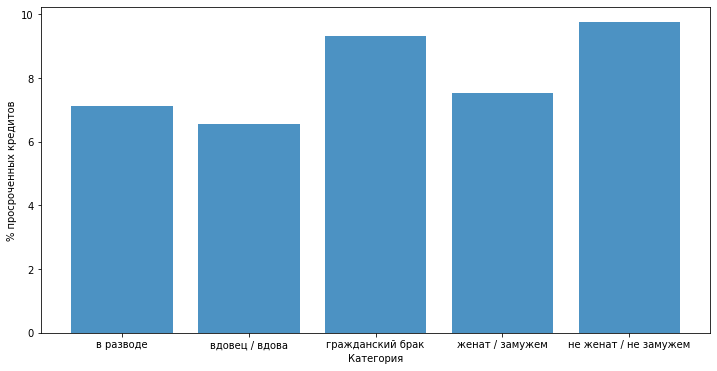

In [22]:
plt.figure(figsize=(12,6))
plt.bar(table_family.index, table_family['процент должников'], alpha=0.8)
plt.ylabel('% просроченных кредитов')
plt.xlabel('Категория')
plt.show()

**Вывод**

Наименее рискованным является выдача займов вдовцам/вдовам (6,56 % должников). Наиболее рискованным - неженатым (9,75 %) и живущим в гражданском браке (9,32 %). Выдавать кредиты разведенным и женатым людям (7,11 % и 7,54 % должников, соответственно)  более рискованно, чем вдовцам/вдовам, но менее рискованно, чем неженатым и живущим в гражданском браке.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [23]:
table_income = data.pivot_table(index='total_income_category', 
                                columns='debt_status', 
                                values = 'debt',
                                aggfunc='count') 
table_income['процент должников'] = (table_income['есть долги']/
                                     (table_income['есть долги'] + 
                                      table_income['нет долгов'])*100) 
display(table_income)

debt_status,есть долги,нет долгов,процент должников
total_income_category,,,
высокий доход,1286,14543,8.124329
низкий доход,101,1373,6.852103
средний доход,354,3814,8.493282


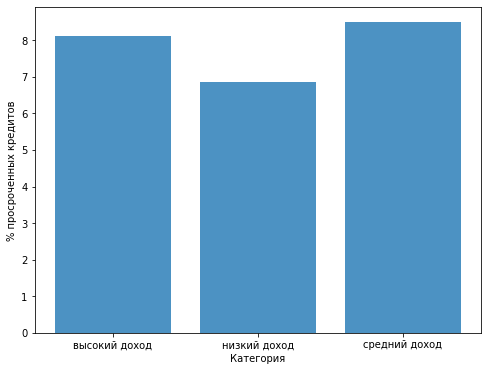

In [24]:
plt.figure(figsize=(8,6))
plt.bar(table_income.index, table_income['процент должников'], alpha=0.8)
plt.ylabel('% просроченных кредитов')
plt.xlabel('Категория')
plt.show()

**Вывод**

Чаще всего просроченную задолженность имеют люди со средним доходом (от 70 до 110 т.р.) - 8,49 %. Люди с высоким доходом (более 110 т.р.) просрочивают выплаты в 8,1 % случаев. Наименее рискованно выдавать кредиты людям с низким доходом (до 70 т.р.), число просрочек составляет 6,85 %.

- Как разные цели кредита влияют на его возврат в срок?

In [25]:
table_purpose = data.pivot_table(index='purpose_category', 
                                 columns='debt_status', 
                                 values = 'debt',
                                 aggfunc='count')
table_purpose['процент должников'] = (table_purpose['есть долги']/
                                      (table_purpose['есть долги'] + 
                                       table_purpose['нет долгов'])*100)  
display(table_purpose)

debt_status,есть долги,нет долгов,процент должников
purpose_category,,,
автомобиль,403,3905,9.354689
недвижимость,782,10032,7.231367
образование,370,3644,9.217738
свадьба,186,2149,7.965739


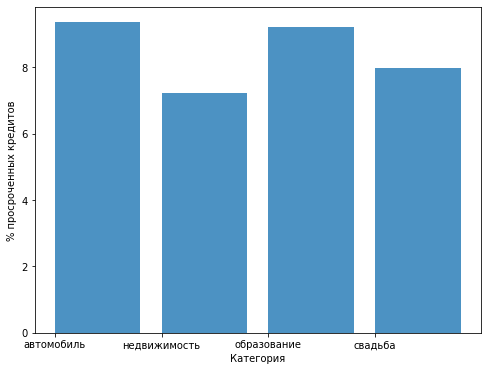

In [27]:
plt.figure(figsize=(8,6))
plt.bar(table_purpose.index, table_purpose['процент должников'], alpha=0.8)
plt.ylabel('% просроченных кредитов')
plt.xlabel('Категория')
plt.show()

**Вывод**

Чаще всего кредиты просрочивают люди, целью которых является покупка автомобиля (9,35 % должников) и получение образования (9,2 %). Менее рискованно выдавать кредиты на недвижимость (7,23 %) и свадьбу (7,96 %).

## Общий вывод

При изучении данных обнаружили следующие проблемы:
* Пропущенные значения в столбцах `days_employed` и `total_income`.
* Отрицательные значения трудового стажа.
* Данные по трудовому стажу и доходу записаны в вещественной форме.
* Явные и неявные дубликаты, записанные в разных регистрах.
* Нестандартная форма записи цели кредита.

Предобработку данных осуществили следующими способами:
* Заменили пропуски на медианное значение всего столбца.
* Заменили вещественные значения на целые.
* Удалили явные дубликаты.
* Исправили неявные дубликаты путем сведения к нижнему регистру.
* Лемматизировали цели кредита и разбили и получили 4 категории: автомобиль, свадьба, недвижимость, образование.
* По наличию детей разделили заемщиков на 2 категории: `'есть дети'` и `'нет детей'`.
* В зависимости от уровня доходов распределили заемщиков по 3 категориям: с высоким, средним и низким доходом (в соответствии с данными Всероссийского центра уровня жизни).
* В столбце `debt_status` распределили заемщиков на имевших и не имевших просроченной задолженности.
* Упростили анализ данных путем создания сводных таблиц.

При анализе данных получили следующие выводы:
* Наиболее рискованно выдавать кредит людям с детьми; неженатым или живущим в гражданском браке;  со средним или высоким доходом; если целью кредита является покупка автомобиля или получение образования.
* Наименее рискованно выдавать кредит бездетным; вдовцам/ вдовам; с низким доходом; если целью кредита является покупка недвижимости или свадьба.


